## Modelo Avanzado de VLP — Beggs & Brill and Hagedorn & Brown Correlations

### 🎯 Notebook Objective

This notebook aims to illustrate la aplicación de las correlaciones **Beggs & Brill** y **Hagedorn & Brown** para el cálculo de la **curva VLP (Vertical Lift Performance)** dentro del paquete `PetroKit`.

Además, se comparan ambas correlaciones y se evalúa su **sensibilidad** a parámetros como el diámetro del tubing y la pipe inclination.
Finalmente, se muestra un ejemplo de **análisis nodal** integrando un modelo **IPR (Standing)** con las curvas VLP avanzadas.

---

## 1️⃣ Theoretical Foundations

### 🔹 VLP Curves

Las curvas **VLP (Vertical Lift Performance)** representan la **pressure drop** que experimenta el fluido desde el fondo hasta la superficie, en función del caudal.
Se calculan a partir de balances de energía que consideran **friction, acceleration, and gravitational gradient losses**.

### 🔹 Correlación de Beggs & Brill (1973)

Developed for multiphase flow in inclined pipes.
Se basa en una clasificación de **flow regimes** (segregado, intermitente, distribuido) y proporciona la fracción de líquido retenido (**holdup**) y la pérdida de presión total:

$$
\Delta P = \Delta P_{f} + \Delta P_{a} + \Delta P_{g}
$$

Donde:

- $( \Delta P_f )$: pérdidas por fricción
- $( \Delta P_a )$: pérdidas por aceleración
- $( \Delta P_g )$: componente gravitacional

### 🔹 Correlación de Hagedorn & Brown (1965)

Modelo empírico derivado de experimentos de two-phase vertical flow.
Particularmente útil en **vertical wells** y condiciones de flujo burbujeante.

Ambas correlaciones se aplican comúnmente para estimar la **flowing bottomhole pressure (pwf)** en función del caudal.

---

## 2️⃣ Library Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from petrokit.vlp_advanced import vlp_curve_beggs, vlp_curve_hagedorn, plot_vlp_compare
from petrokit.ipr_advanced import standing_ipr
from petrokit.nodal import nodal_analysis, plot_nodal


---

## 3️⃣ Well and Fluid Parameter Definition


In [2]:
# Base System Properties
p_wf_range = np.linspace(0, 3000, 30)  # psi
q_range = np.linspace(200, 2000, 30)   # STB/d

D = 2.5           # Tubing diameter [in]
Len = 3000        # Length [ft]
theta = 90        # Inclination angle [°] (90 = vertical)
q_gas = 200.0     # Gas rate [MSCF/d]
rho_l = 60.0      # Liquid density [lb/ft3]
rho_g = 0.1       # Gas density [lb/ft3]
mu_l = 1.5        # Liquid viscosity [cP]
mu_g = 0.02       # Gas viscosity [cP]


---

## 4️⃣ VLP Curve Calculation


In [3]:
q_arr, pwf_bb, H_bb = vlp_curve_beggs(q_range, q_gas_mscf_d=q_gas, d_in=D, well_length_ft=Len, theta_deg=theta, rho_l=rho_l, rho_g=rho_g, mu_l=mu_l, mu_g=mu_g)
_, pwf_hb, H_hb = vlp_curve_hagedorn(q_range, q_gas_mscf_d=q_gas, d_in=D, well_length_ft=Len, rho_l=rho_l, rho_g=rho_g, mu_l=mu_l, mu_g=mu_g, theta_deg=theta)


## 5️⃣ Comparison and Visualization


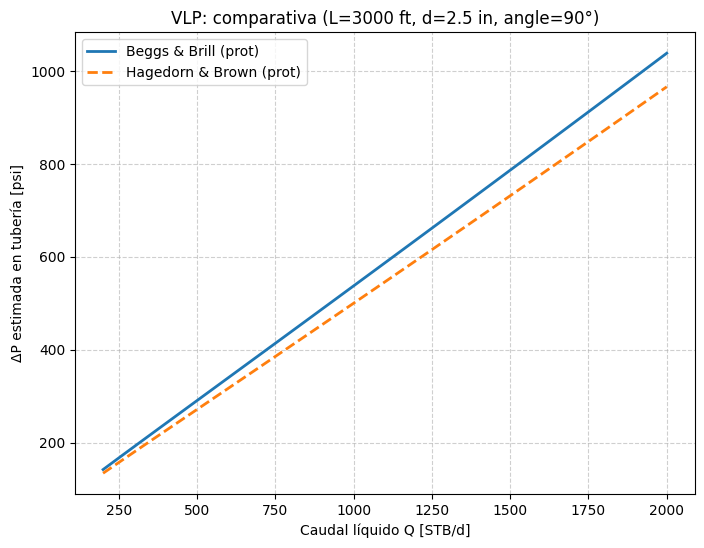

In [4]:
plot_vlp_compare(q_range, q_gas, D, Len, theta, rho_l, rho_g, mu_l, mu_g)
